## Ejemplo utilizando splines:

In [2]:
import pandas as pd
import os
import numpy as np
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
import pprint

In [3]:
os.getcwd()

'/datos/Practica_final_equipos'

In [4]:
data_2 = pd.read_csv("Datos_csv.csv")

In [5]:
data_2.head()

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
0,1,2017,01-sep,0,1,6872.013385,6976.172363,1
1,2,2017,01-sep,1,2,6660.573651,6709.388672,1
2,3,2017,01-sep,2,3,6504.232961,6568.017090,1
3,4,2017,01-sep,3,4,6435.836442,6502.294434,1
4,5,2017,01-sep,4,5,6437.741557,6384.402344,1


In [6]:
data_2.describe()

,muestras,anio,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
count,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000
mean,4209.362595,2018.605797,11.500000,12.500000,7745.438583,7734.933778,1.955153
std,2448.412619,0.919625,6.922324,6.922324,974.363777,977.956108,0.806060
min,1.000000,2017.000000,0.000000,1.000000,4288.339301,4230.882324,1.000000
25%,2096.750000,2018.000000,5.750000,6.750000,7011.455212,6998.106567,1.000000
50%,4192.500000,2019.000000,11.500000,12.500000,7807.317117,7794.049072,2.000000
75%,6288.250000,2019.000000,17.250000,18.250000,8484.490007,8478.522950,3.000000
max,8760.000000,2020.000000,23.000000,24.000000,10567.494660,11267.710940,3.000000


In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25152 entries, 0 to 25151
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     25152 non-null  int64  
 1   anio         25152 non-null  int64  
 2   fecha        25152 non-null  object 
 3   hora_inicio  25152 non-null  int64  
 4   hora_fin     25152 non-null  int64  
 5   dema_int     25152 non-null  float64
 6   dem_inst     25152 non-null  float64
 7   aniomovil    25152 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [8]:
data_2.dema_int

0        6872.013385
1        6660.573651
2        6504.232961
3        6435.836442
4        6437.741557
            ...     
25147    8223.639187
25148    8241.447436
25149    8604.842271
25150    8519.651856
25151    8279.839812
Name: dema_int, Length: 25152, dtype: float64

### Trabajando con polyfit n = 1,500:

In [21]:
#Creando arreglo de las filas a remover del dataframe:
del_rows_1500 = range(1500,25152)
print(del_rows_1500)

range(1500, 25152)


In [14]:
#Trabajando con 1500 valores:
data_2_1500 = data_2.drop(data_2.index[del_rows_1500], axis = 0)

In [15]:
data_2_1500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     1500 non-null   int64  
 1   anio         1500 non-null   int64  
 2   fecha        1500 non-null   object 
 3   hora_inicio  1500 non-null   int64  
 4   hora_fin     1500 non-null   int64  
 5   dema_int     1500 non-null   float64
 6   dem_inst     1500 non-null   float64
 7   aniomovil    1500 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 105.5+ KB


In [16]:
data_2_1500.dema_int

0       6872.013385
1       6660.573651
2       6504.232961
3       6435.836442
4       6437.741557
           ...     
1495    6902.985314
1496    7093.632639
1497    7593.186041
1498    7922.896426
1499    8057.841838
Name: dema_int, Length: 1500, dtype: float64

In [17]:
# Interpolación con polyfit n = 1500 para el grado del polinimio
mpoints_1500 = 1500
d_1500 = 1499
x_1500 = np.linspace(0, mpoints_1500, mpoints_1500)

In [18]:
coeff_1500 = np.polyfit(x_1500, data_2_1500.dema_int, d_1500)

/home/miuser/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/miuser/.local/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/miuser/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


ValueError: On entry to DLASCL parameter number 4 had an illegal value

### Trabajando con polyfit n = 100:

In [22]:
#Creando arreglo de las filas a remover del dataframe:
del_rows_100 = range(100,25152)
print(del_rows_100)

range(100, 25152)


In [23]:
#Trabajando con 100 valores:
data_2_100 = data_2.drop(data_2.index[del_rows_100], axis = 0)

In [24]:
data_2_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     100 non-null    int64  
 1   anio         100 non-null    int64  
 2   fecha        100 non-null    object 
 3   hora_inicio  100 non-null    int64  
 4   hora_fin     100 non-null    int64  
 5   dema_int     100 non-null    float64
 6   dem_inst     100 non-null    float64
 7   aniomovil    100 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 7.0+ KB


In [25]:
data_2_100.dema_int

0     6872.013385
1     6660.573651
2     6504.232961
3     6435.836442
4     6437.741557
         ...     
95    7324.198272
96    6862.726635
97    6695.890878
98    6505.227678
99    6483.619702
Name: dema_int, Length: 100, dtype: float64

In [26]:
# Interpolación con polyfit n = 100 para el grado del polinimio
mpoints_100 = 100
d_100 = 99
x_100 = np.linspace(0, mpoints_100, mpoints_100)

In [27]:
coeff_100 = np.polyfit(x_100, data_2_100.dema_int, d_100)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


### Trabajando con splines n = 100:

In [28]:
#Haciendo splines cúbicos, n = 100:
spline_100 = interp1d(x_100, data_2_100.dema_int, kind = 'cubic', fill_value='extrapolate')

In [29]:
y_eval_spline_100 = spline_100(x_100)
print('x_100.shape para verificar:', x_100.shape[0])
print('y_eval_spline_100.shape para verificar:', y_eval_spline_100.shape[0])

x_100.shape para verificar: 100
y_eval_spline_100.shape para verificar: 100


Gráfica con splines n = 100: 



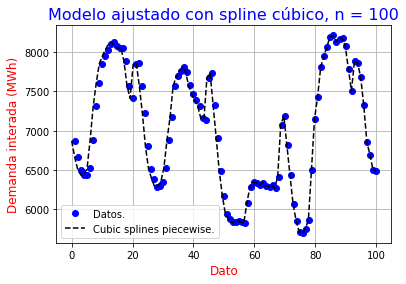

In [31]:
print("Gráfica con splines n = 100: \n")
plt.plot(data_2_100.muestras, data_2_100.dema_int, 'bo', x_100, y_eval_spline_100, 'k--')
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, n = 100", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines n = 1,500:

In [32]:
#Haciendo splines cúbicos, n = 1,500:
spline_1500 = interp1d(x_1500, data_2_1500.dema_int, kind = 'cubic', fill_value='extrapolate')

In [33]:
y_eval_spline_1500 = spline_1500(x_1500)
print('x_1500.shape para verificar:', x_1500.shape[0])
print('y_eval_spline_1500.shape para verificar:', y_eval_spline_1500.shape[0])

x_1500.shape para verificar: 1500
y_eval_spline_1500.shape para verificar: 1500


Gráfica con splines n = 1,500: 



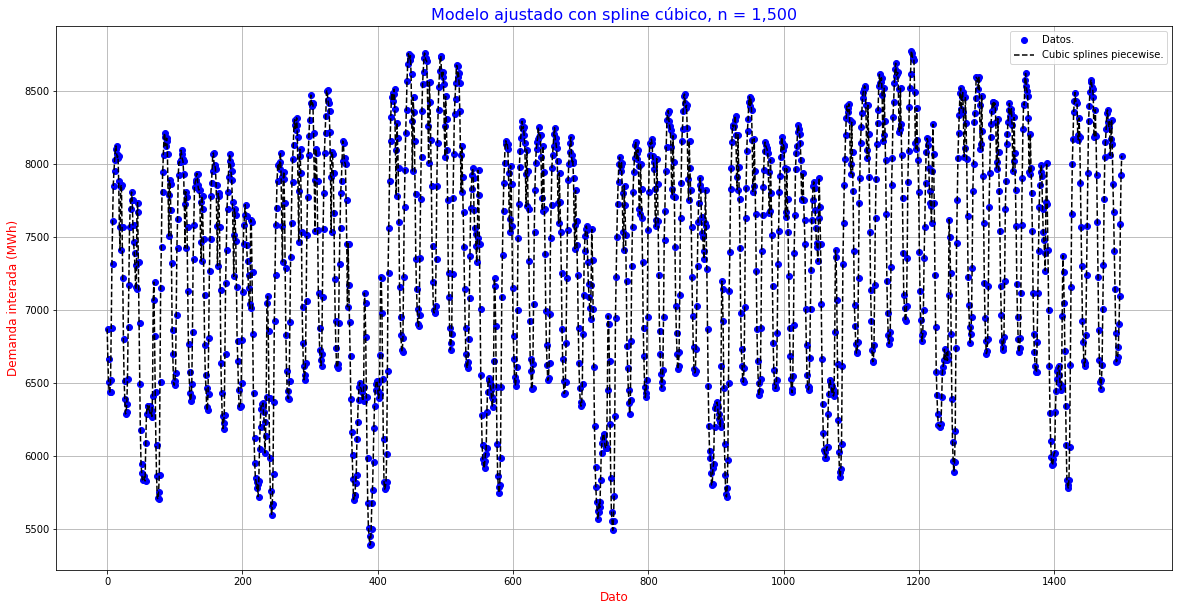

In [35]:
print("Gráfica con splines n = 1,500: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_2_1500.muestras, data_2_1500.dema_int, 'bo', x_1500, y_eval_spline_1500, 'k--')
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, n = 1,500", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines 100% de los datos:

In [36]:
mpoints_100p = 25152
d_100p = 25151
x_100p = np.linspace(0, mpoints_100p, mpoints_100p)

In [37]:
#Haciendo splines cúbicos, 100% datos:
spline_100p = interp1d(x_100p, data_2.dema_int, kind = 'cubic', fill_value='extrapolate')

In [45]:
y_eval_spline_100p = spline_100p(x_100p)
print('x_100%.shape para verificar:', x_100p.shape[0])
print('y_eval_spline_100%.shape para verificar:', y_eval_spline_100p.shape[0])

x_100%.shape para verificar: 25152
y_eval_spline_100%.shape para verificar: 25152


Gráfica con splines 100% datos: 



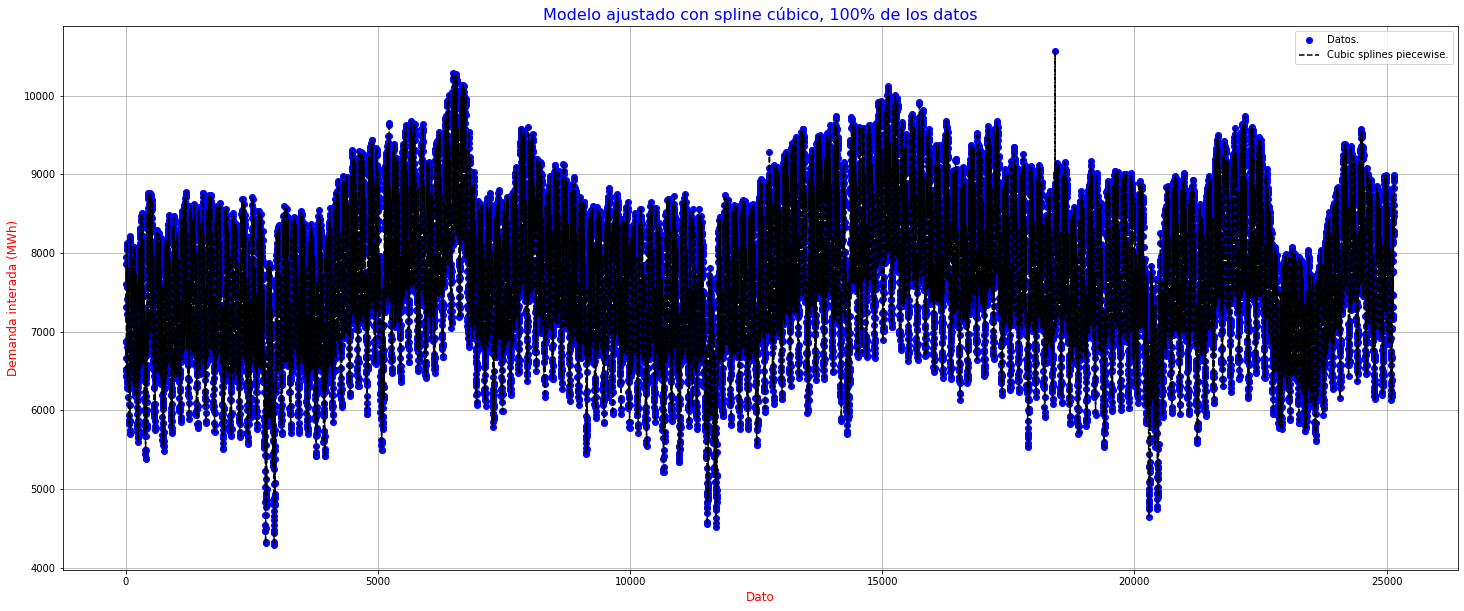

In [46]:
print("Gráfica con splines 100% datos: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_2.index, data_2.dema_int, "bo", x_100p, y_eval_spline_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, 100% de los datos", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines 80% de los datos:

In [47]:
#Creando arreglo para eliminar el 20% final de los datos
del_rows_80p = range(20121,25152)
print(del_rows_80p)

range(20121, 25152)


In [48]:
#Trabajando con el 80% de los valores valores:
data_2_80p = data_2.drop(data_2.index[del_rows_80p], axis = 0)

In [49]:
data_2_80p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 0 to 20120
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     20121 non-null  int64  
 1   anio         20121 non-null  int64  
 2   fecha        20121 non-null  object 
 3   hora_inicio  20121 non-null  int64  
 4   hora_fin     20121 non-null  int64  
 5   dema_int     20121 non-null  float64
 6   dem_inst     20121 non-null  float64
 7   aniomovil    20121 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.4+ MB


In [50]:
data_2_80p.dema_int

0        6872.013385
1        6660.573651
2        6504.232961
3        6435.836442
4        6437.741557
            ...     
20116    7037.538071
20117    7067.574023
20118    7195.404202
20119    7551.717845
20120    7967.850435
Name: dema_int, Length: 20121, dtype: float64

In [51]:
mpoints_80p = 20121
d_80p = 20120
x_80p = np.linspace(0, mpoints_80p, mpoints_80p)

In [52]:
#Haciendo splines cúbicos, 80% datos:
spline_80p = interp1d(x_80p, data_2_80p.dema_int, kind = 'cubic', fill_value='extrapolate')

In [53]:
y_eval_spline_80p = spline_80p(x_80p)
print('x_80%.shape para verificar:', x_80p.shape[0])
print('y_eval_spline_80%.shape para verificar:', y_eval_spline_80p.shape[0])

x_80%.shape para verificar: 20121
y_eval_spline_80%.shape para verificar: 20121


Gráfica con splines 80% datos: 



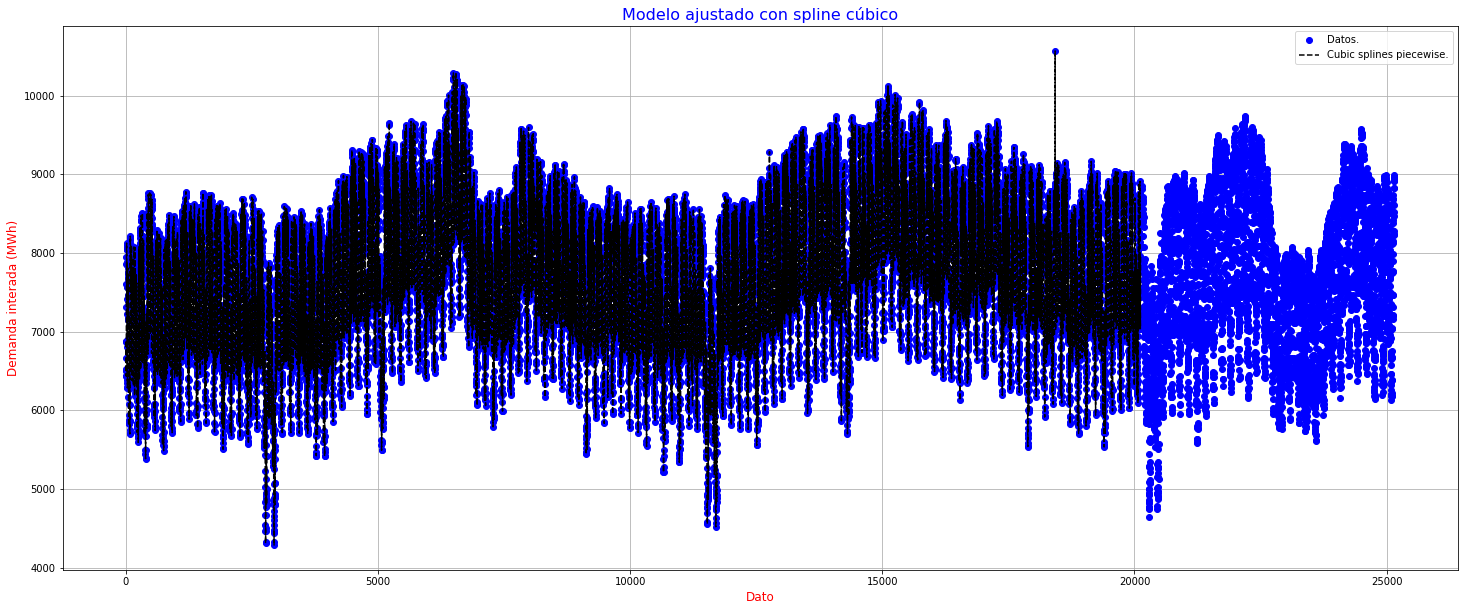

In [55]:
print("Gráfica con splines 80% datos: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_2.index, data_2.dema_int, "bo", x_80p, y_eval_spline_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Gráfica con splines 80% datos: 



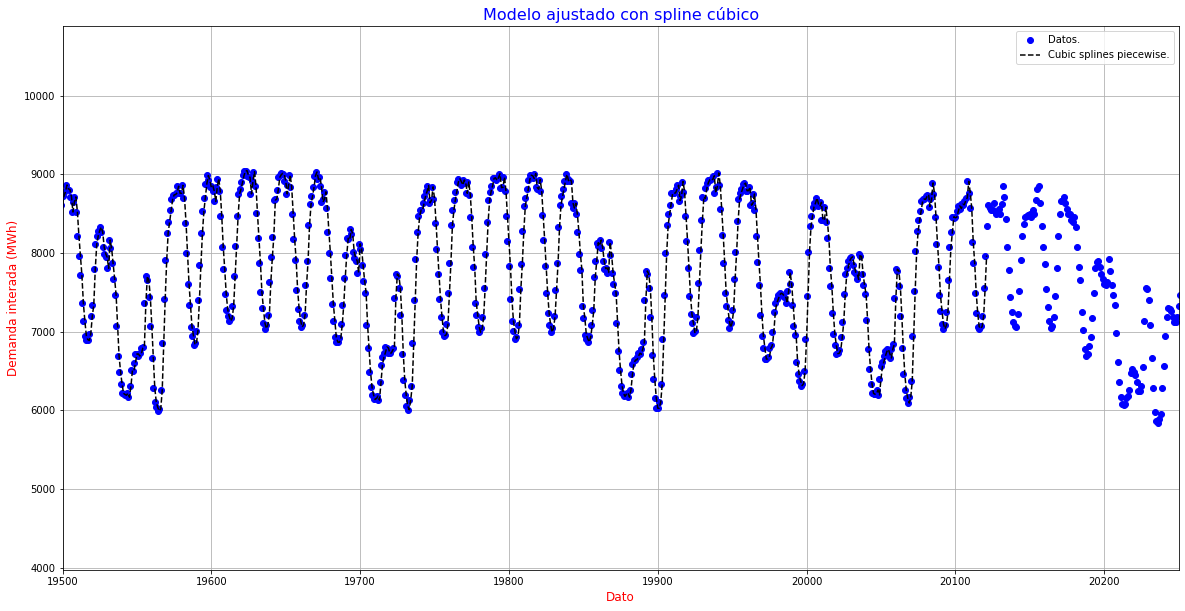

In [56]:
print("Gráfica con splines 80% datos: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(19500, 20250)
#plt.ylim(-5, 5)
plt.plot(data_2.index, data_2.dema_int, "bo", x_80p, y_eval_spline_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Extrapolando con splines al 100% de los datos:

In [57]:
y_eval_spline_80_100p = spline_80p(data_2.index)
print('x_80%.shape para verificar:', data_2.index)
print('y_eval_spline_80%.shape para verificar:', y_eval_spline_80_100p.shape[0])

x_80%.shape para verificar: RangeIndex(start=0, stop=25152, step=1)
y_eval_spline_80%.shape para verificar: 25152


Extrapolando con splines al 100% de los datos: 



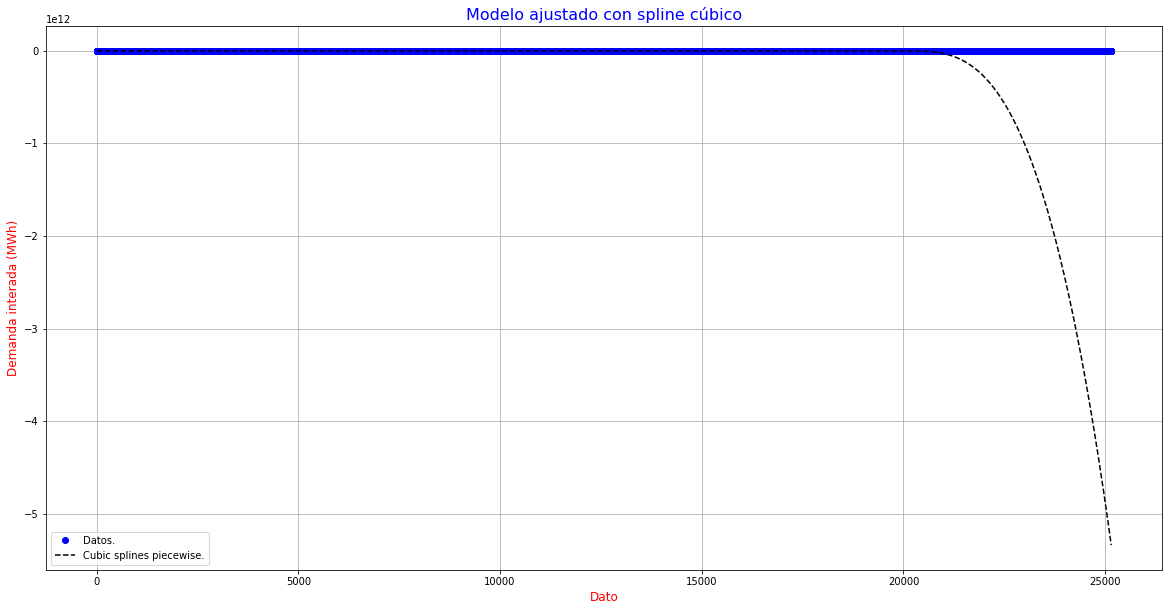

In [58]:
print("Extrapolando con splines al 100% de los datos: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_2.index, data_2.dema_int, "bo", data_2.index, y_eval_spline_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Extrapolando con splines al 100% de los datos: 



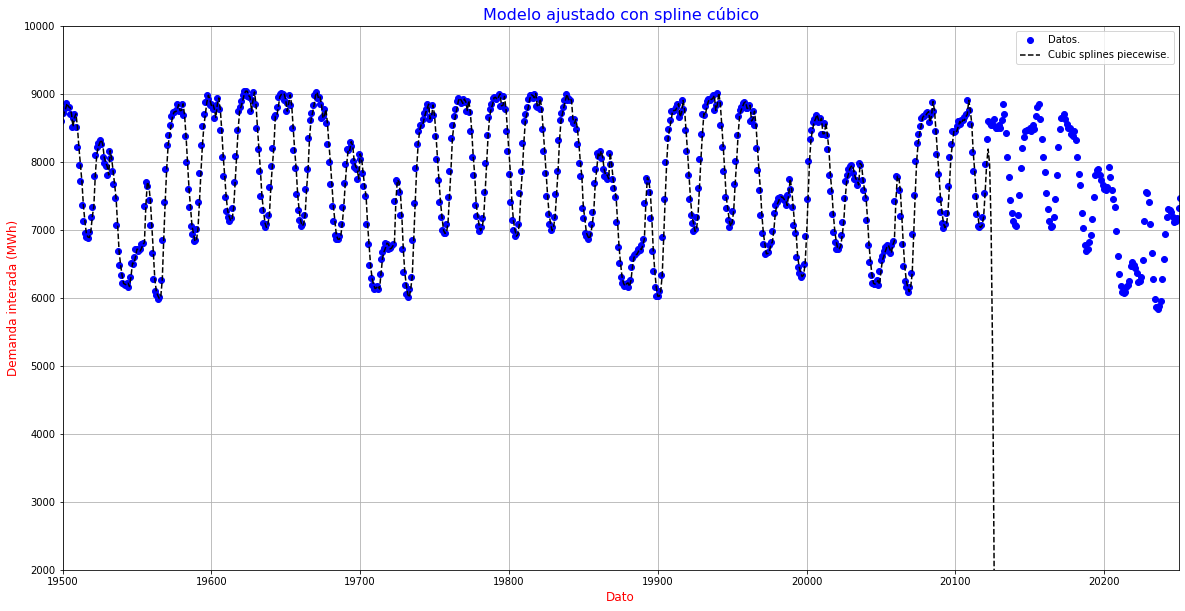

In [59]:
print("Extrapolando con splines al 100% de los datos: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(19500, 20250)
plt.ylim(2000, 10000)
plt.plot(data_2.index, data_2.dema_int, "bo", data_2.index, y_eval_spline_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda interada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()